Registering controller: SpectraChartController
Registering controller: SpectraChartController3D
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
>> Browsing ./sample_data
No file found for train_group data in ./sample_data. Continuing without it.
No file found for test_group data in ./sample_data. Continuing without it.

Python Dataset:
 FeatureBlock with 1 sources and 189 samples
Source 0: FeatureSource(shape=(189, 1, 2151), dtype=float32, processing_ids=['raw'], mean=0.46620580554008484, variance=0.1492786556482315)
Targets with 189 samples and 1 targets
  • raw: (189, 1), ancestor=none, transformer=type
  • numeric: (189, 1), ancestor=raw, transformer=FunctionTransformer
shape: (189, 8)
┌─────┬────────┬────────┬───────────┬───────┬────────┬─────────────┬──────────────┐
│ row ┆ sample ┆ origin ┆ partition ┆ group ┆ branch ┆ processings ┆ augmentation │
│ --- ┆ ---    ┆ ---    ┆ ---       ┆ ---   ┆ ---    ┆ ---         ┆ ---          │
│ i32 ┆ i3

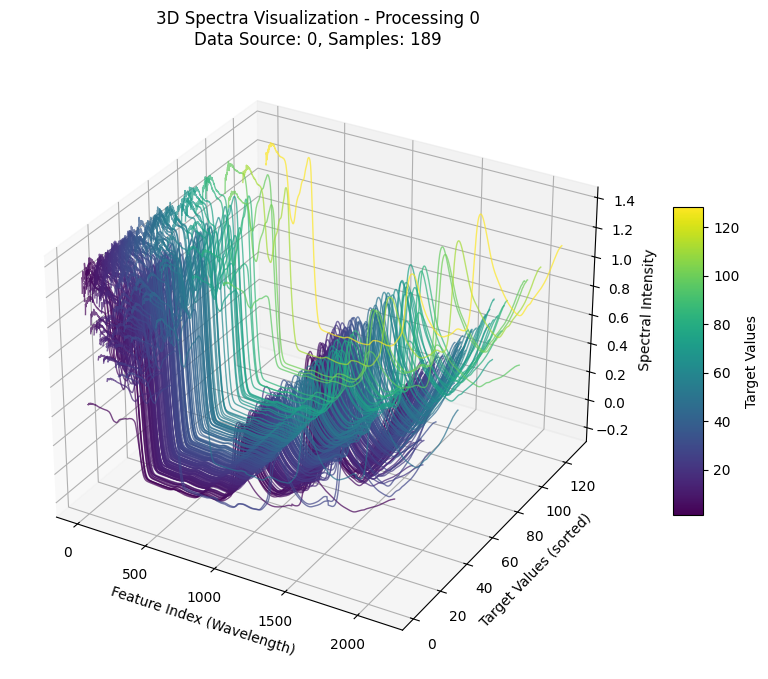

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Dataset state after step 1:
FeatureBlock with 1 sources and 189 samples
Source 0: FeatureSource(shape=(189, 1, 2151), dtype=float32, processing_ids=['raw'], mean=0.46620580554008484, variance=0.1492786556482315)
Targets with 189 samples and 1 targets
  • raw: (189, 1), ancestor=none, transformer=type
  • numeric: (189, 1), ancestor=raw, transformer=FunctionTransformer
shape: (189, 8)
┌─────┬────────┬────────┬───────────┬───────┬────────┬─────────────┬──────────────┐
│ row ┆ sample ┆ origin ┆ partition ┆ group ┆ branch ┆ processings ┆ augmentation │
│ --- ┆ ---    ┆ ---    ┆ ---       ┆ ---   ┆ ---    ┆ ---         ┆ ---          │
│ i32 ┆ i32    ┆ i32    ┆ cat       ┆ i8    ┆ i8     ┆ str         ┆ cat          │
╞═════╪════════╪════════╪═══════════╪═══════╪════════╪═════════════╪════════

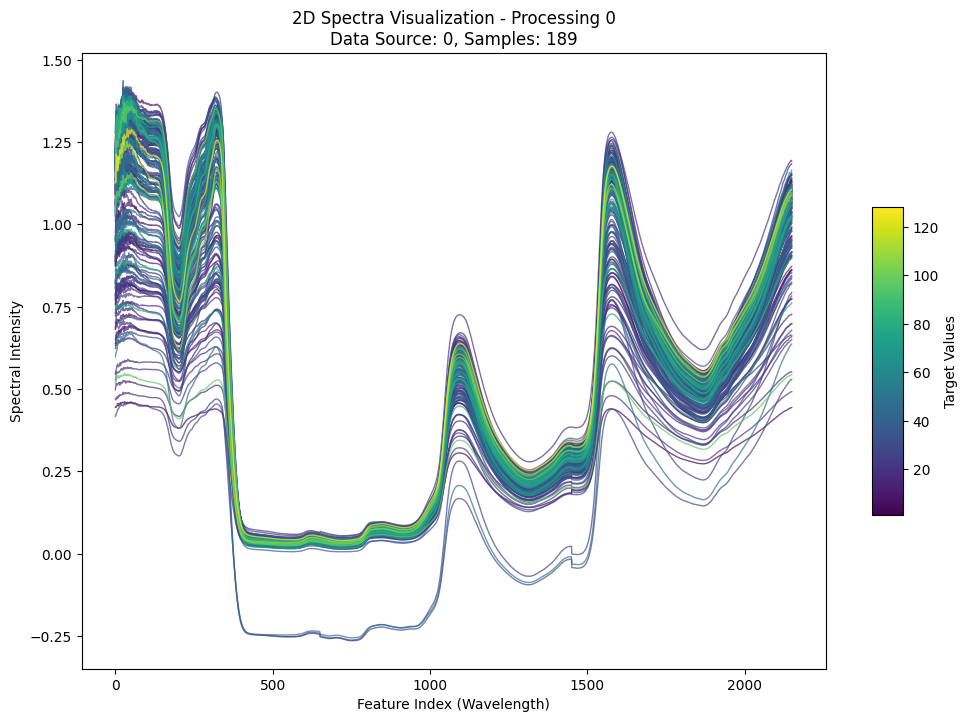

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Dataset state after step 2:
FeatureBlock with 1 sources and 189 samples
Source 0: FeatureSource(shape=(189, 1, 2151), dtype=float32, processing_ids=['raw'], mean=0.46620580554008484, variance=0.1492786556482315)
Targets with 189 samples and 1 targets
  • raw: (189, 1), ancestor=none, transformer=type
  • numeric: (189, 1), ancestor=raw, transformer=FunctionTransformer
shape: (189, 8)
┌─────┬────────┬────────┬───────────┬───────┬────────┬─────────────┬──────────────┐
│ row ┆ sample ┆ origin ┆ partition ┆ group ┆ branch ┆ processings ┆ augmentation │
│ --- ┆ ---    ┆ ---    ┆ ---       ┆ ---   ┆ ---    ┆ ---         ┆ ---          │
│ i32 ┆ i32    ┆ i32    ┆ cat       ┆ i8    ┆ i8     ┆ str         ┆ cat          │
╞═════╪════════╪════════╪═══════════╪═══════╪════════╪═════════════╪════════

In [2]:
%load_ext autoreload
%autoreload 2

from nirs4all.pipeline.runner import PipelineRunner
from nirs4all.pipeline.config import PipelineConfig
from nirs4all.dataset import dataset
from sample import config as python_config
from nirs4all.dataset.loader import get_dataset
from nirs4all.controllers.registry import reset_registry
from nirs4all.controllers import *

dataset_py = get_dataset(python_config["dataset"])
print("\n", "="*200, "\nPython Dataset:\n", dataset_py)

print("\n", "="*200, "\nRunning Python Config:\n")
py_config = PipelineConfig(python_config)
# json_config = PipelineConfig("sample.json")
# yaml_config = PipelineConfig("sample.yaml")

runner = PipelineRunner(max_workers=4, continue_on_error=False)

res_dataset, history, pipeline = runner.run(py_config, dataset_py)


In [3]:
# import kfold
from sklearn.model_selection import KFold

# random data for kfold
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [1, 2, 3, 4, 5]
kf = KFold(n_splits=2, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

t = kf.split(X)
print(t)
l = list(t)
for train_index, test_index in l:
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [0 3] TEST: [1 2 4]
TRAIN: [1 2 4] TEST: [0 3]
<generator object _BaseKFold.split at 0x000002006DE75070>
TRAIN: [0 3] TEST: [1 2 4]
TRAIN: [1 2 4] TEST: [0 3]
